In [2]:
import pandas as pd

df = pd.read_excel("../data/Online Retail.xlsx", sheet_name="Online Retail")

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# Calculate the amount column

df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [4]:
df.drop(columns=["StockCode", "Description", "Quantity", "UnitPrice", "CustomerID", "Country"], inplace=True)

df

,InvoiceNo,InvoiceDate,TotalPrice
0,536365,2010-12-01 08:26:00,15.30
1,536365,2010-12-01 08:26:00,20.34
2,536365,2010-12-01 08:26:00,22.00
3,536365,2010-12-01 08:26:00,20.34
4,536365,2010-12-01 08:26:00,20.34
...,...,...,...
541904,581587,2011-12-09 12:50:00,10.20
541905,581587,2011-12-09 12:50:00,12.60
541906,581587,2011-12-09 12:50:00,16.60
541907,581587,2011-12-09 12:50:00,16.60


In [7]:
# Filter negative invoices (they are not sales)
df = df[df["TotalPrice"]>=0]

df

,InvoiceNo,InvoiceDate,TotalPrice
0,536365,2010-12-01 08:26:00,15.30
1,536365,2010-12-01 08:26:00,20.34
2,536365,2010-12-01 08:26:00,22.00
3,536365,2010-12-01 08:26:00,20.34
4,536365,2010-12-01 08:26:00,20.34
...,...,...,...
541904,581587,2011-12-09 12:50:00,10.20
541905,581587,2011-12-09 12:50:00,12.60
541906,581587,2011-12-09 12:50:00,16.60
541907,581587,2011-12-09 12:50:00,16.60


In [17]:
invoice_dates = df.groupby(["InvoiceNo"])[["InvoiceDate"]].agg("first")

invoice_dates

,InvoiceDate
InvoiceNo,
536365,2010-12-01 08:26:00
536366,2010-12-01 08:28:00
536367,2010-12-01 08:34:00
536368,2010-12-01 08:34:00
536369,2010-12-01 08:35:00
...,...
581584,2011-12-09 12:25:00
581585,2011-12-09 12:31:00
581586,2011-12-09 12:49:00


In [18]:
invoice_amounts = df.groupby(["InvoiceNo"])[["TotalPrice"]].agg("sum")

invoice_amounts

,TotalPrice
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85
...,...
581584,140.64
581585,329.05
581586,339.20


In [20]:
timeseries_invoices = pd.concat([invoice_amounts, invoice_dates], axis=1, join="inner")

timeseries_invoices

,TotalPrice,InvoiceDate
InvoiceNo,,
536365,139.12,2010-12-01 08:26:00
536366,22.20,2010-12-01 08:28:00
536367,278.73,2010-12-01 08:34:00
536368,70.05,2010-12-01 08:34:00
536369,17.85,2010-12-01 08:35:00
...,...,...
581584,140.64,2011-12-09 12:25:00
581585,329.05,2011-12-09 12:31:00
581586,339.20,2011-12-09 12:49:00


In [22]:
daily_sales = timeseries_invoices.groupby([timeseries_invoices['InvoiceDate'].dt.date]).sum()

daily_sales

,TotalPrice
InvoiceDate,
2010-12-01,58960.79
2010-12-02,47748.38
2010-12-03,46943.71
2010-12-05,31774.95
2010-12-06,54830.46
...,...
2011-12-05,88741.96
2011-12-06,56713.21
2011-12-07,75439.16


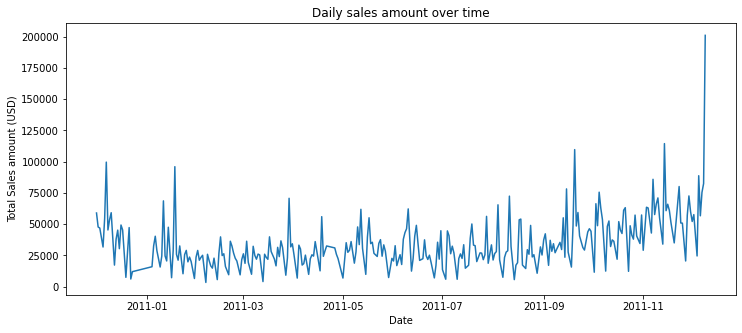

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Daily sales amount over time")
plt.ylabel("Total Sales amount (USD)")
plt.xlabel("Date")
plt.show()

In [32]:
!pip install statsmodels

     |████████████████████████████████| 9.9 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 7.4 MB/s eta 0:00:01


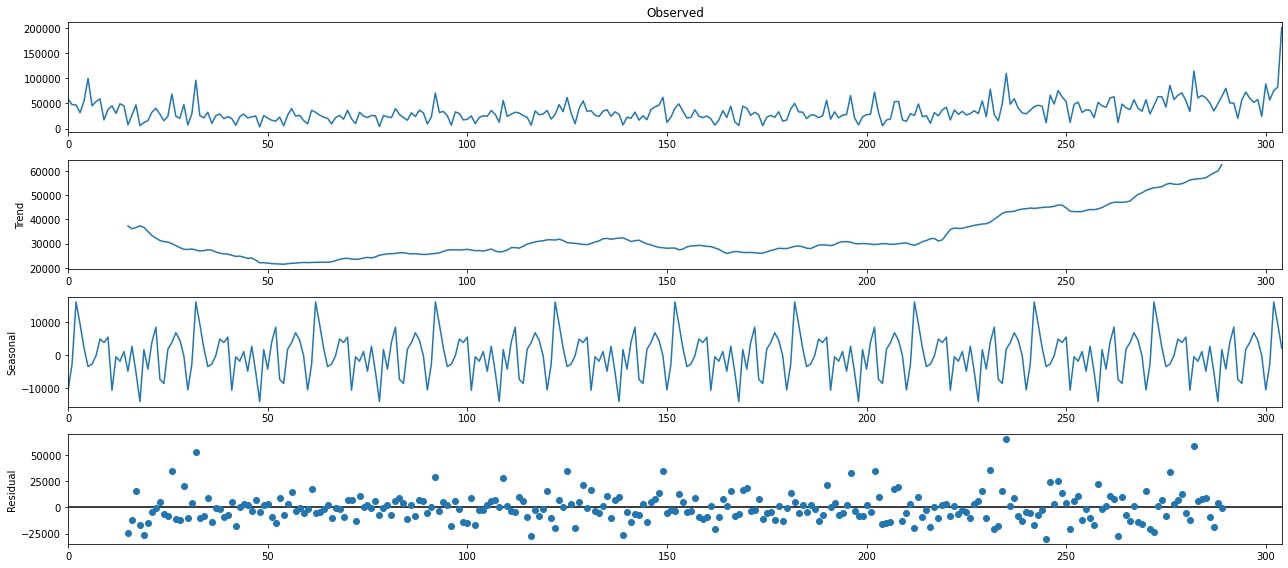

In [38]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(daily_sales.values, model='additive', period=30)
fig = decomposition.plot()
plt.show()

/home/rafik/Documents/InnoUni/S22/data_mining/second_repo/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rafik/Documents/InnoUni/S22/data_mining/second_repo/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/rafik/Documents/InnoUni/S22/data_mining/second_repo/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


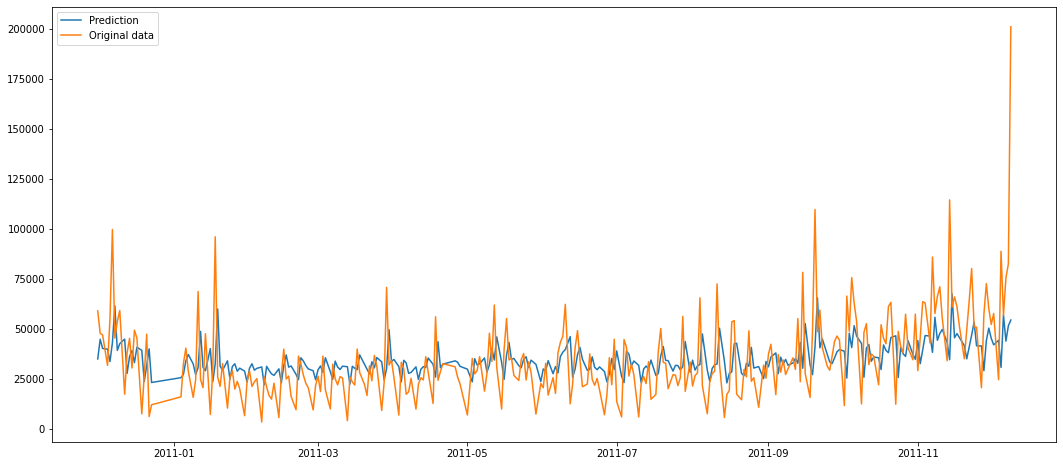

In [58]:
from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(daily_sales, order=(1, 0, 0))
res = mod.fit()
#res.summary()

predictions = res.get_prediction()
plt.plot(daily_sales.index, predictions.predicted_mean.values, label="Prediction")
plt.plot(daily_sales.index,  daily_sales.values, label="Original data")
plt.legend()
plt.show()  
